In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from simulations import MARRON_WAND_SIMS

In [6]:
sns.set_theme(color_codes=True, style="white", context="talk", font_scale=1.5)
PALETTE = sns.color_palette("Set1", n_colors=8)
PALETTE = PALETTE[:5] + PALETTE[6:]
PALETTE.reverse()
sns.set_palette(PALETTE)

FIG_PATH = "figs"

TESTS = [
    "KMERF",
    "MGC",
    "Dcorr",
    "Hsic",
    "HHG",
    "CCA",
    "RV",
]

In [10]:
def plot_power(fig_name=None):
    if fig_name[-1] == "d":
        sample_dimensions = range(3, 11)
    elif fig_name[-1] == "n":
        sample_dimensions = range(10, 110, 10)

    if "two-sample" in fig_name:
        simulations = {
            sim: " ".join([s.capitalize() for s in sim.split("_")])
            for sim in MARRON_WAND_SIMS.keys()
        }
        nrows, ncols = 3, 5
    elif "independence" in fig_name:
        simulations = {
            "linear": ("Linear", 1000),
            "exponential": ("Exponential", 1000),
            "cubic": ("Cubic", 1000),
            "joint_normal": ("Joint Normal", 10),
            "step": ("Step", 20),
            "quadratic": ("Quadratic", 20),
            "w_shaped": ("W-Shaped", 20),
            "spiral": ("Spiral", 20),
            "uncorrelated_bernoulli": ("Bernoulli", 100),
            "logarithmic": ("Logarithmic", 100),
            "fourth_root": ("Fourth Root", 20),
            "sin_four_pi": ("Sine 4\u03C0", 10),
            "sin_eight_pi": ("Sine 8\u03C0", 10),
            "square": ("Square", 40),
            "two_parabolas": ("Two Parabolas", 20),
            "circle": ("Circle", 20),
            "ellipse": ("Ellipse", 20),
            "diamond": ("Diamond", 40),
            "multiplicative_noise": ("Multiplicative", 10),
            "multimodal_independence": ("Independence", 100),
        }
        nrows, ncols = 4, 5

    _, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 12))

    for r, row in enumerate(ax):
        for c, col in enumerate(row):
            sim = list(simulations)[ncols * r + c]
            col.axhline(y=0.05, linestyle=":", color="#000000", label="Alpha")

            for test in TESTS[::-1]:
                xs = sample_dimensions
                try:
                    ys = np.genfromtxt(
                        f"{fig_name}/{sim}-{test}-{fig_name}.csv",
                        delimiter=",",
                    )
                except FileNotFoundError:
                    continue
                plot_kwargs = {"lw": 3}
                if test == "KMERF":
                    plot_kwargs = {"color": "#e41a1c", "lw": 4}
                col.plot(xs, ys, label=test, **plot_kwargs)

            col.set(
                xscale="linear",
                title=(
                    "Asymmetric\nDouble Claw"
                    if sim == "asymmetric_double_claw"
                    else simulations[sim]
                ),
                xlabel=("# of Dimensions" if r == 2 and c == 2 else ""),
                ylabel=(f"Power for 100 Samples" if r == 1 and c == 0 else ""),
                yticks=([0, 1] if c == 0 else []),
                ylim=[-0.01, 1.01],
                xticks=(
                    [sample_dimensions[0], sample_dimensions[-1]] if r == 2 else []
                ),
            )
            sns.despine(right=True)
            plt.tight_layout(pad=0.4, w_pad=1.0, h_pad=1.0)

    leg = plt.legend(
        bbox_to_anchor=(0.5, 0),
        bbox_transform=plt.gcf().transFigure,
        ncol=len(TESTS) + 1,
        loc="upper center",
        reverse=True,
    )
    leg.get_frame().set_linewidth(0.0)
    for legobj in leg.legend_handles:
        legobj.set_linewidth(5.0)

    plt.savefig(f"{FIG_PATH}/{fig_name}.pdf", transparent=True, bbox_inches='tight')

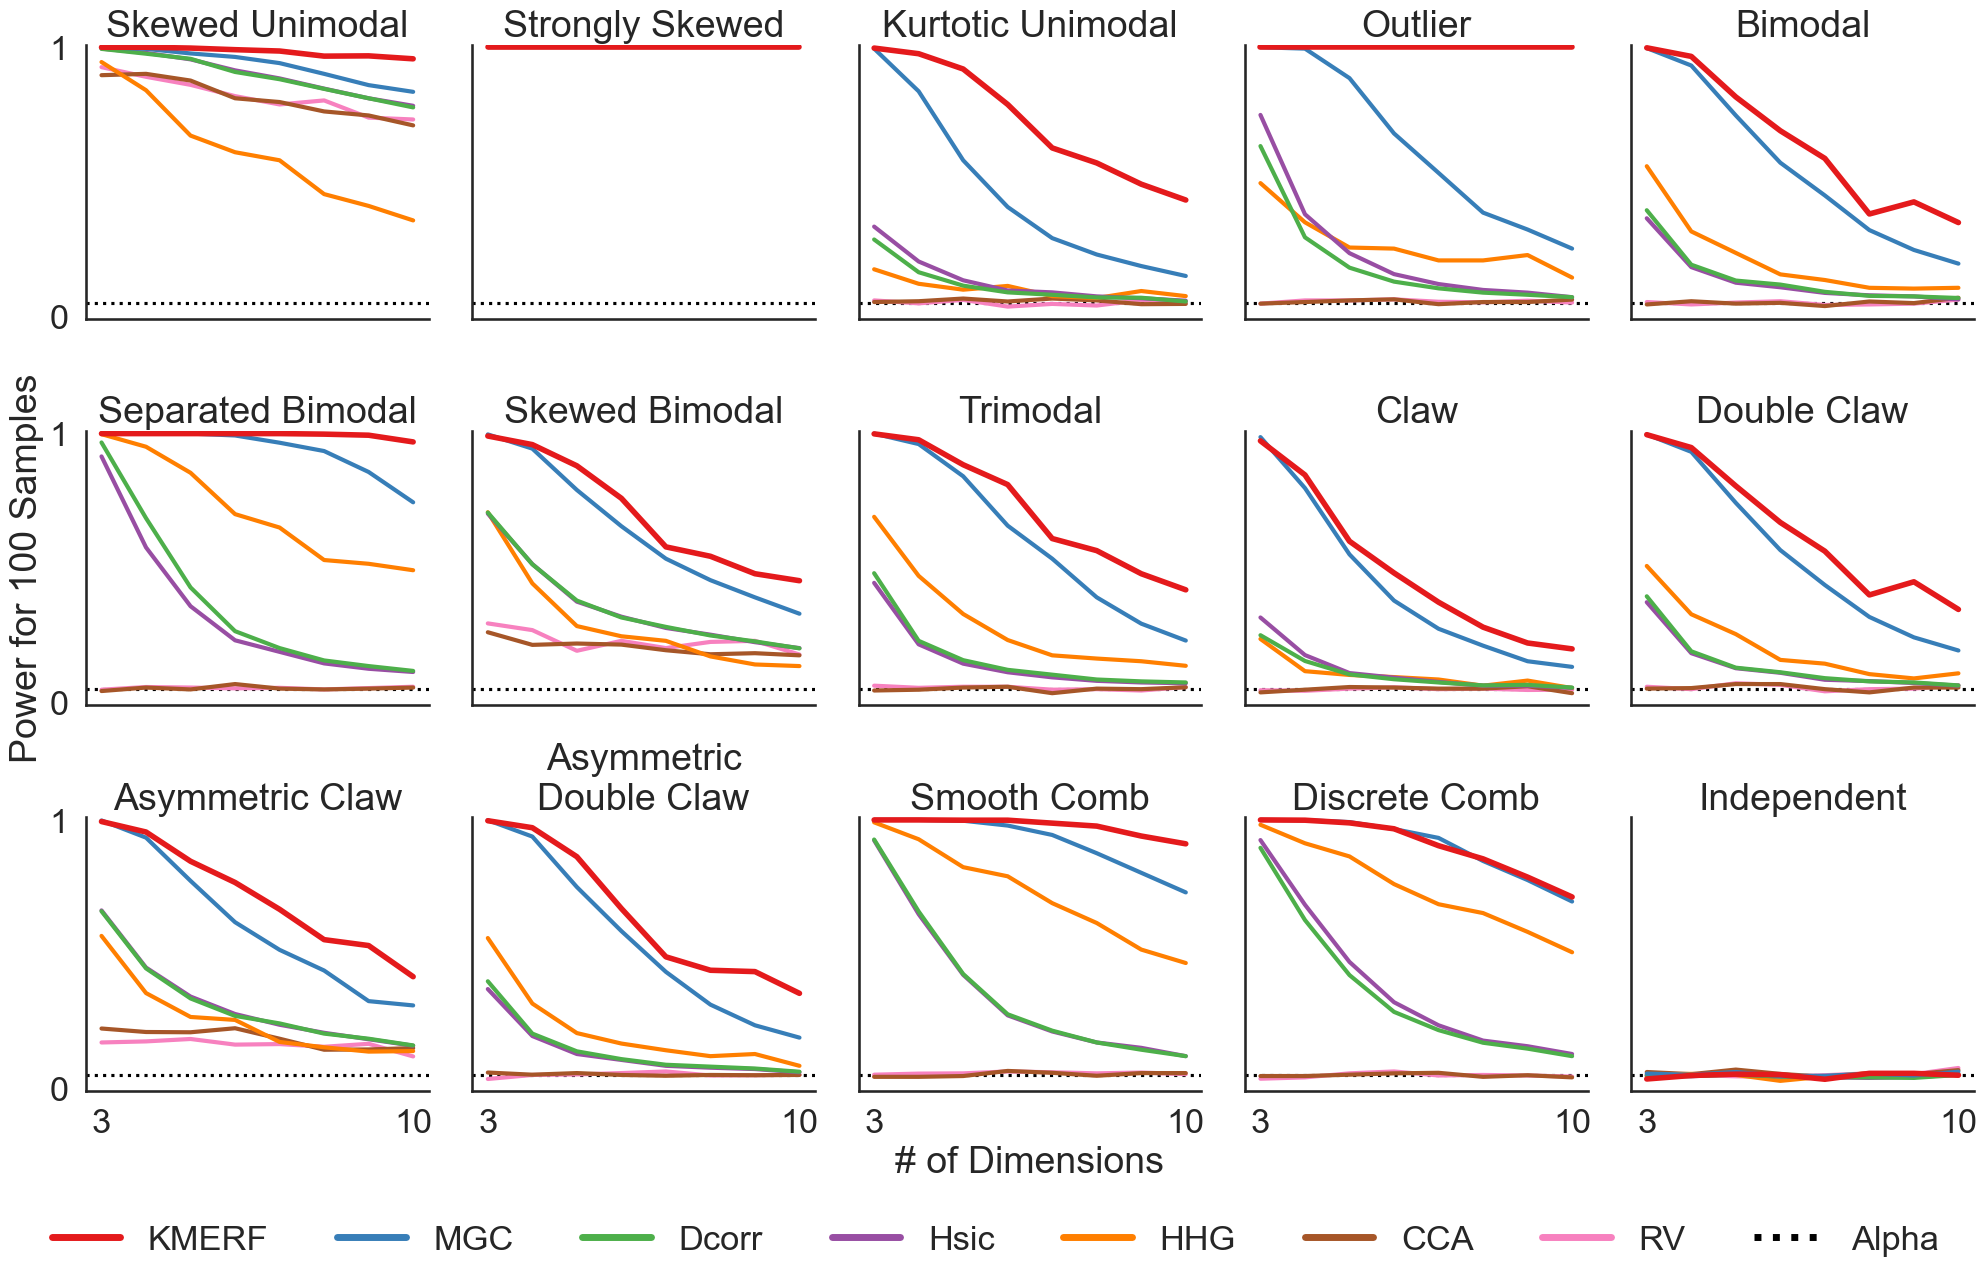

In [8]:
plot_power("two-sample-power-vs-d")

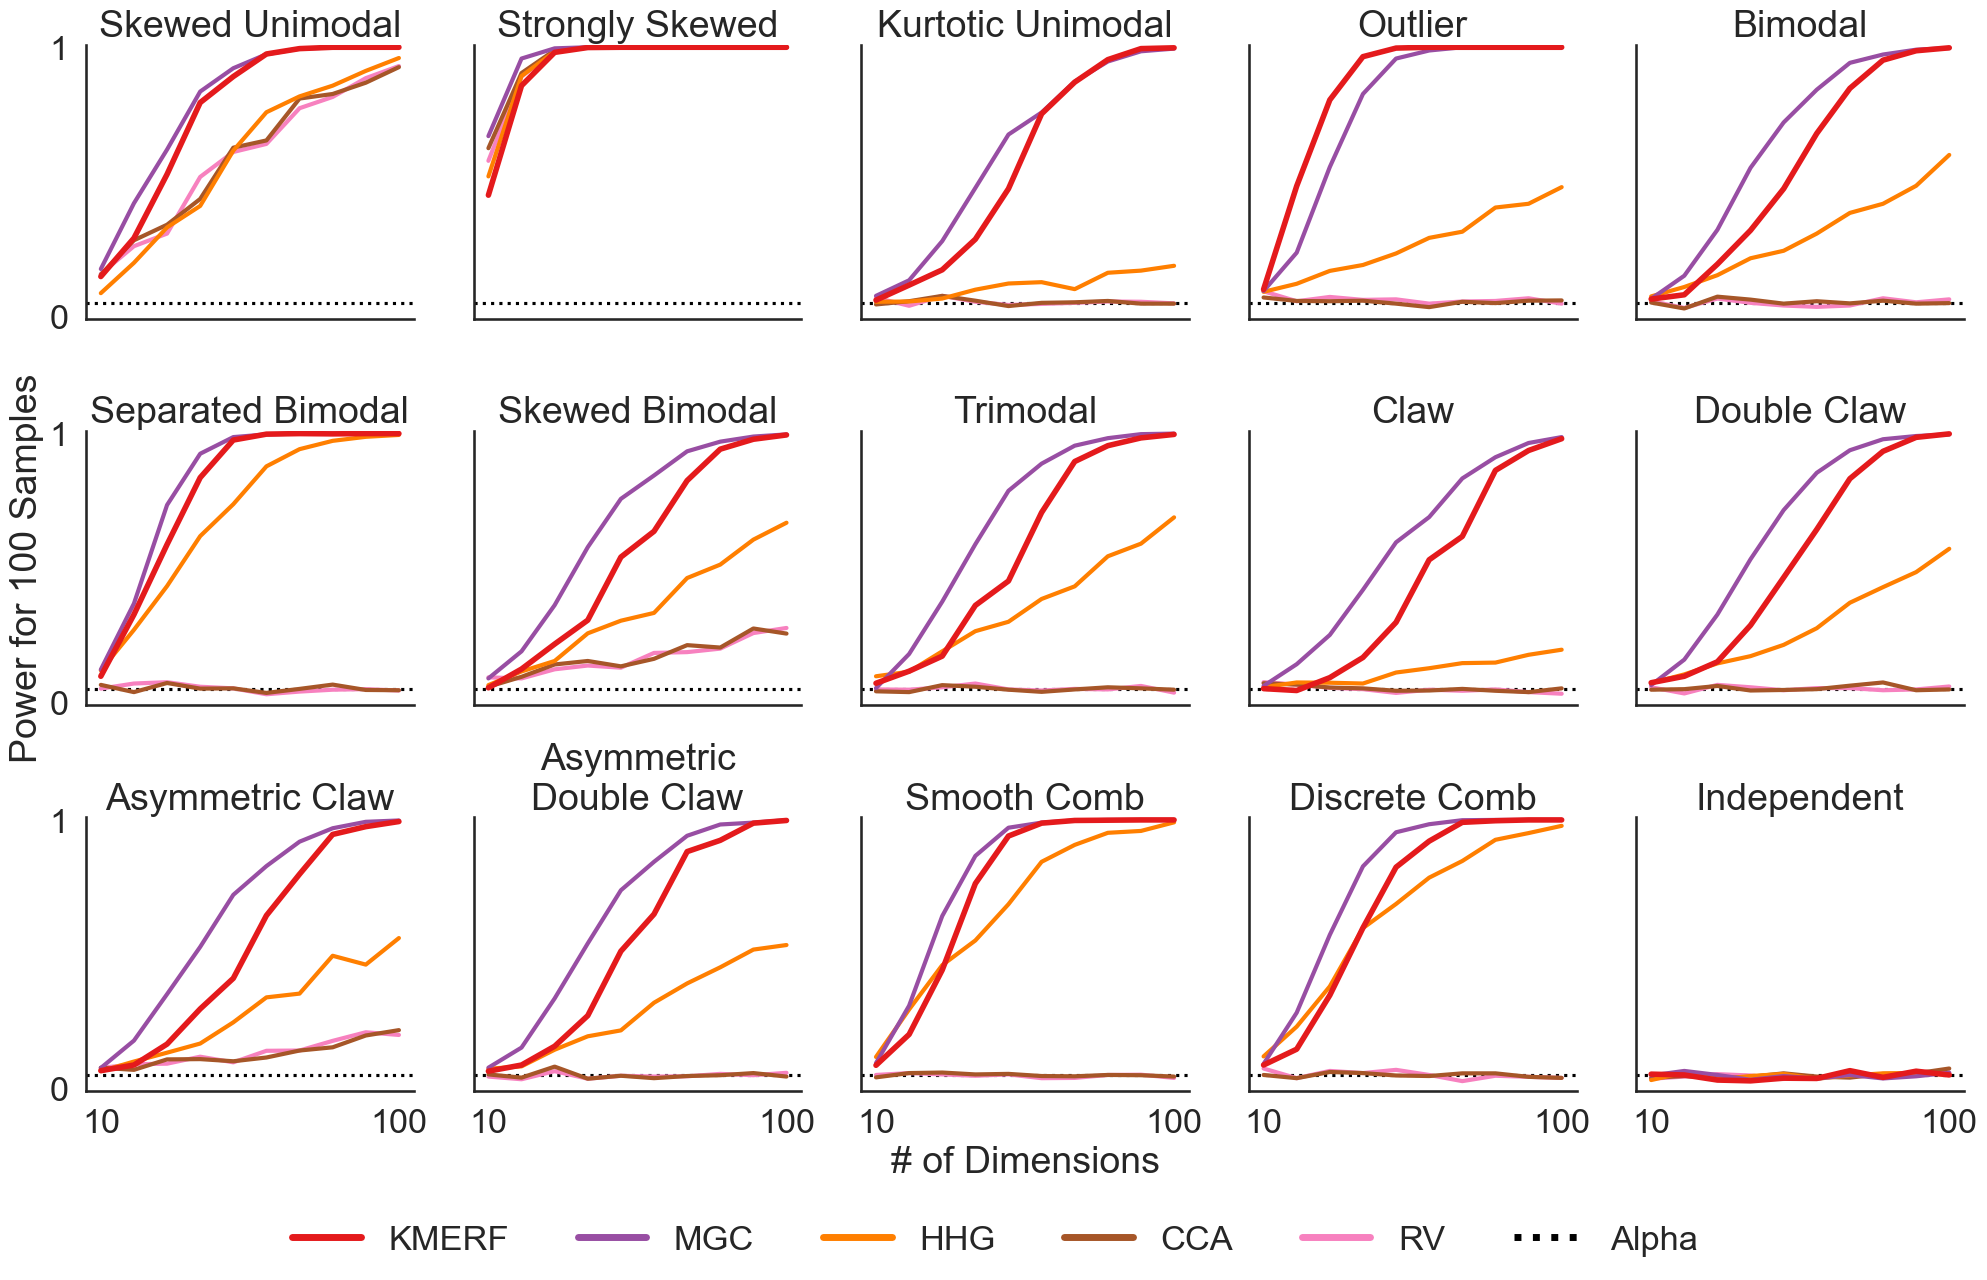

In [11]:
plot_power("two-sample-power-vs-n")